In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"]="4"
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [4]:
path = r"C:\Users\buitr\Desktop\Data Analyst\Data Analytics Immersion\A6"

In [5]:
df_all_years = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'all_years_cleaned.csv'))

In [6]:
df_all_years.head()

,Country,Year,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [7]:
df = df_all_years.drop(['Country', 'Year'], axis=1)

In [8]:
# define the range of potential clusters in the data
num_cl = range(1,10)

# defines k-means clusters in the range we assigned aboved
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [10]:
print(score)

[-1294.008543199032, -488.96439155860566, -307.01894932665584, -237.8053575118004, -194.78309608705857, -177.2741499712965, -170.91153873238525, -153.082005279748, -145.35952769430298]


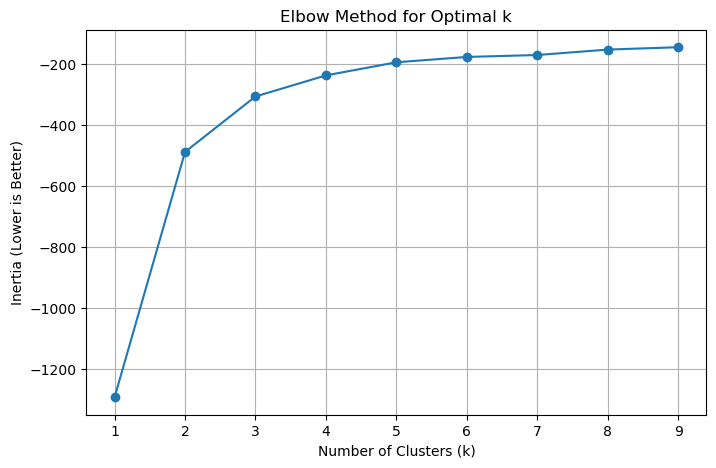

In [11]:
# Plot the scores on a chart to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(num_cl, score, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Lower is Better)')
plt.grid(True)
plt.show()

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
df['clusters']=kmeans.fit_predict(df)

In [15]:
df.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2


In [16]:
df['clusters'].value_counts()

clusters
1    308
0    278
2    196
Name: count, dtype: int64

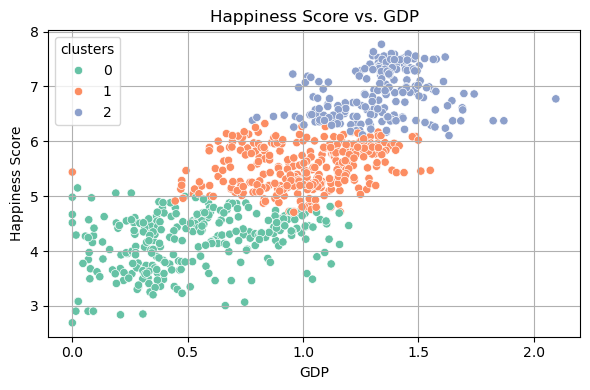

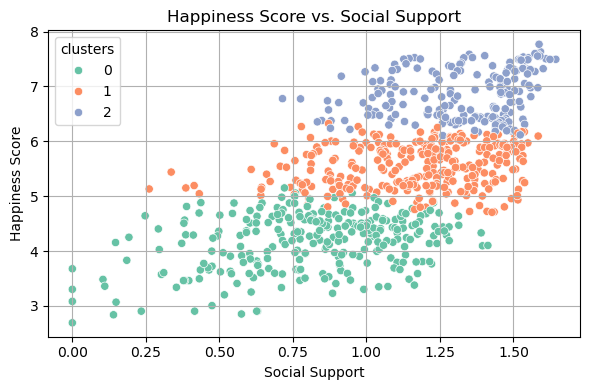

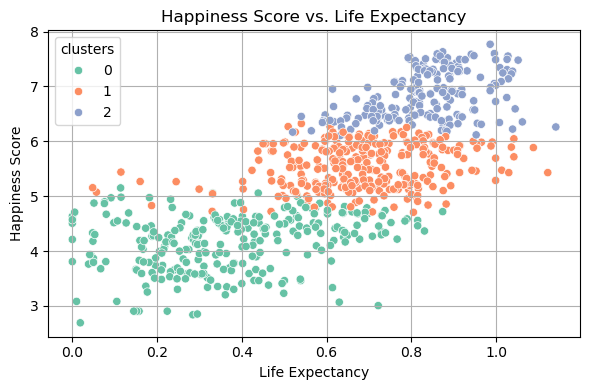

In [17]:
# Visualize the clusters

features = ['GDP', 'Social Support', 'Life Expectancy']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Happiness Score', hue='clusters', palette='Set2')
    plt.title(f'Happiness Score vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Do the Clusters Make Sense?
Yes the clusters actually tell a pretty clear story:
- The orange group represents high-performing countries: they score well in both GDP and social support, and not surprisingly, they have the highest happiness levels.
- The purple group is somewhere in the middle — decent GDP and social ties, and their happiness is also moderate.
- The green group struggles in both economic and social dimensions, and happiness scores are clearly lower.

This aligns well with the idea that both money and human connection play big roles in how satisfied people are. The split feels logical, not random.

No big outliers or surprises so far. but it would still be interesting to explore why some countries fall into the purple group rather than orange. Maybe some other factors are at play (e.g., culture, politics, history). Might be worth digging into that later.

In [19]:
# 3D visualization

# Define a color map that matches  cluster labels
color_map = {
    'Green': '#2ca02c',   # typical green
    'Orange': '#ff7f0e',  # typical orange
    'Purple': '#9467bd'   # typical purple
}

# Map color labels to actual color codes
df['color'] = df['cluster_label'].map(color_map)

# Create 3D plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['GDP'],
    df['Happiness Score'],
    df['Social Support'],
    c=df['color'],      # use mapped color
    s=40,
    alpha=0.7
)

# Labels and title
ax.set_xlabel('GDP', fontsize=12)
ax.set_ylabel('Happiness Score', fontsize=12)
ax.set_zlabel('Social Support', fontsize=12)
ax.set_title('3D Cluster Plot', fontsize=14)
plt.savefig(os.path.join(path,'04 Analysis', '3D.png'), dpi=300, bbox_inches='tight')

plt.show()

KeyError: 'cluster_label'

In [ ]:
# descriptive analysis
columns_to_summarize = ['Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom	Generosity','Trust']

# Define a mapping: cluster number → color
cluster_labels = {0: 'Green', 1: 'Orange', 2: 'Purple'}
df['cluster_label'] = df['clusters'].map(cluster_labels)

# Group by the color labels and describe all numerical columns
cluster_summary = df.groupby('cluster_label').describe()

pd.set_option('display.max_columns', None) 
cluster_summary

# Cluster summary (Mean & Median)
### Orange Cluster
Highest happiness score (mean 6.85 / median 6.84).
Also has the highest GDP and social support. That makes sense, with more money and more connection people have more life satisfaction.

### Purple Cluster
Middle of the pack (mean happiness 5.54 / median 5.53).
GDP and support also in the middle, so maybe people are doing okay but not thriving.

### Green Cluster
Lowest happiness (mean 4.17 / median 4.29), and also the lowest GDP and social support.
Clear pattern here with lower resources seem tied to lower well-being.

Overall, the results match the idea that happiness is strongly linked to both economic wealth and social connection. No big surprises, but useful to see the clusters confirm it.

This is helpful for the next steps — for example, we can:

Explore what makes each group unique and dig into why certain countries don’t follow the usual pattern.
Use these clusters to build better prediction models, maybe even tailor them to specific types of countries.
Start thinking in terms of types of wellbeing and not just rich vs. poor, but maybe "connected but not rich" or "wealthy but low trust."
Come up with new questions. For example, why are some high-GDP countries not as happy as expected?
It’s a good foundation for the next round of analysis or even for storytelling with data.